<a href="https://colab.research.google.com/github/AnushreeChopde/DataVizFall2020_Colab/blob/master/Class_Activity_lec03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anushree Chopde

# Visualize New York Times Database for COVID-19
## Case Study Bristol and Suffolk, MA

## Loading US County Level Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# https://github.com/nytimes/covid-19-data repository location
db = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"

## loading data into dataframe
df = pd.read_csv(db)

In [5]:
df.head(5)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [6]:
df.describe()

,fips,cases,deaths
count,516515.000000,521534.000000,521534.000000
mean,31112.210654,905.890617,35.717286
std,16245.368054,5865.388093,400.523564
min,1001.000000,0.000000,0.000000
25%,18159.000000,13.000000,0.000000
50%,29181.000000,69.000000,1.000000
75%,46085.000000,334.000000,8.000000
max,78030.000000,251024.000000,23744.000000


## Explore Data

In [7]:
df.nunique()

date        234
county     1923
state        55
fips       3205
cases     16027
deaths     2381
dtype: int64

In [8]:
# let us get fips for 2 counties  (Bristol and Suffolk, MA)
## fips stands for : Federal Information Processing Standards
Bristol_fips = df[(df['county'] == 'Bristol') & (df['state'] == 'Massachusetts')]['fips'].unique()[0].astype('int')
print(f'Bristol fips is {Bristol_fips}')

Suffolk_fips = df[(df['county'] == 'Suffolk') & (df['state'] == 'Massachusetts')]['fips'].unique()[0].astype('int')
print(f'Suffolk fips is {Suffolk_fips}')

Bristol fips is 25005
Suffolk fips is 25025


In [51]:
def get_county_stat(df,fips):
  output = df[df['fips'] == fips][['date','county','state','cases','deaths']].copy()
  output.set_index('date',inplace=True)
  output.index = pd.to_datetime(output.index)
  return output

get_county_stat(df,Bristol_fips).head()
#get_county_stat(df,Suffolk_fips).head()

,county,state,cases,deaths
date,,,,
2020-03-14,Bristol,Massachusetts,1,0
2020-03-15,Bristol,Massachusetts,1,0
2020-03-16,Bristol,Massachusetts,2,0
2020-03-17,Bristol,Massachusetts,5,0
2020-03-18,Bristol,Massachusetts,5,0


## Explore Data Type

In [21]:
df_Bristol = get_county_stat(df,25005)
df_Bristol.describe()
df_Suffolk = get_county_stat(df,25025)
df_Suffolk.describe()

,cases,deaths
count,181.000000,181.000000
mean,6164.651934,398.828729
std,3387.379061,245.945587
min,1.000000,0.000000
25%,3270.000000,155.000000
50%,7872.000000,496.000000
75%,8907.000000,617.000000
max,9860.000000,670.000000


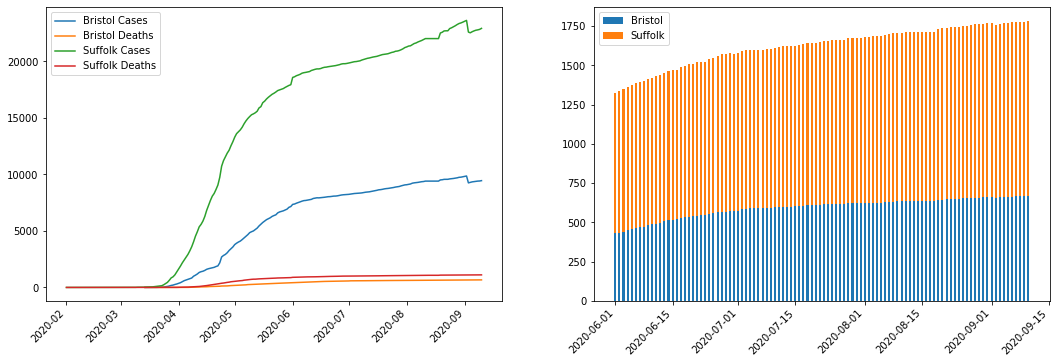

In [108]:
f,ax = plt.subplots(1,2,figsize=(18,6))
ax[0].plot(df_Bristol.index, df_Bristol.cases, label="Bristol Cases")
ax[0].plot(df_Bristol.index, df_Bristol.deaths, label="Bristol Deaths")
ax[0].plot(df_Suffolk.index, df_Suffolk.cases, label="Suffolk Cases")
ax[0].plot(df_Suffolk.index, df_Suffolk.deaths, label="Suffolk Deaths")
ax[0].legend()
f.autofmt_xdate(rotation=45)
f.savefig('covid-19.svg')

df_Bristol_deaths = df_Bristol.loc[lambda df:df.index >= '2020-06-01',['deaths']]
df_Suffolk_deaths = df_Suffolk.loc[lambda df:df.index >= '2020-06-01',['deaths']]

width = 0.5       # the width of the bars: can also be len(x) sequence

ax[1].bar(df_Bristol_deaths.index, df_Bristol_deaths.deaths, width, label='Bristol')
ax[1].bar(df_Suffolk_deaths.index, df_Suffolk_deaths.deaths, width, bottom=df_Bristol_deaths.deaths, label='Suffolk')
ax[1].legend()
f.autofmt_xdate(rotation=45)


## Top 10 counties by number of cases and deaths

,date,state,fips,cases,deaths
county,,,,,
Los Angeles,2020-09-10,California,6037.0,251024,6128
New York City,2020-09-10,New York,NaN,241686,23744
Miami-Dade,2020-09-10,Florida,12086.0,162893,2789
Maricopa,2020-09-10,Arizona,4013.0,136571,3133
Cook,2020-09-10,Minnesota,27031.0,132966,5103
Harris,2020-09-10,Texas,48201.0,113504,2363
Dallas,2020-09-10,Texas,48113.0,77948,1021
Broward,2020-09-10,Florida,12011.0,73869,1258
Clark,2020-09-10,Wisconsin,55019.0,61871,1240


In [27]:
top_ten_cases = df.groupby('county').max().sort_values(by='cases', ascending=False)[:10]
pd.set_option('display.max_column', None)
print(top_ten_cases)

                     date       state     fips   cases  deaths
county                                                        
Los Angeles    2020-09-10  California   6037.0  251024    6128
New York City  2020-09-10    New York      NaN  241686   23744
Miami-Dade     2020-09-10     Florida  12086.0  162893    2789
Maricopa       2020-09-10     Arizona   4013.0  136571    3133
Cook           2020-09-10   Minnesota  27031.0  132966    5103
Harris         2020-09-10       Texas  48201.0  113504    2363
Dallas         2020-09-10       Texas  48113.0   77948    1021
Broward        2020-09-10     Florida  12011.0   73869    1258
Clark          2020-09-10   Wisconsin  55019.0   61871    1240
Riverside      2020-09-10  California   6065.0   54868    1094


In [28]:
top_ten_deaths = df.groupby('county').max().sort_values(by='deaths', ascending=False)[:10]
pd.set_option('display.max_column', None)
print(top_ten_deaths)

                     date          state     fips   cases  deaths
county                                                           
New York City  2020-09-10       New York      NaN  241686   23744
Los Angeles    2020-09-10     California   6037.0  251024    6128
Cook           2020-09-10      Minnesota  27031.0  132966    5103
Maricopa       2020-09-10        Arizona   4013.0  136571    3133
Wayne          2020-09-10  West Virginia  54099.0   32877    2941
Miami-Dade     2020-09-10        Florida  12086.0  162893    2789
Nassau         2020-09-10       New York  36059.0   45445    2706
Harris         2020-09-10          Texas  48201.0  113504    2363
Essex          2020-09-10       Virginia  51057.0   20820    2121
Middlesex      2020-09-10       Virginia  51119.0   27769    2094


### Death rate per FIPS

In [104]:
data_per_fips = df.loc[lambda df: df['date'] == df['date'].max(), ['county', 'state', 'fips', 'cases', 'deaths']]
data_per_fips_countywise = data_per_fips.set_index('county')
cases = data_per_fips_countywise['cases']
deaths = data_per_fips_countywise['deaths']

In [106]:
death_rate_per_fips = (deaths / cases) * 100
death_rate_per_fips

county
Autauga       1.554404
Baldwin       0.951790
Barbour       0.891720
Bibb          1.515152
Blount        0.839161
                ...   
Sweetwater    0.626959
Teton         0.220751
Uinta         0.645161
Washakie      5.454545
Weston        0.000000
Length: 3237, dtype: float64

## Bonus Point
## A function that makes "Folium Choropleth Map" for Weekly Cases, Weekly Deaths and Weekly Mortality Rate
### ALL COUNTIES


#### def Folium_Choropleth(type = 'cases',date=''):


In [ ]:
import folium
from folium import plugins
from folium.plugins import HeatMap

#df_daily = df.diff().fillna(0)
#df_daily.tail(10)



In [ ]:
#df_rolling_avg = df_daily.iloc[-14:].rolling(window=7).mean().fillna(0)

#def Folium_Choropleth(type = 'cases', date=' '):
